# ML as Lifestyle Challenge 1 #

Este notebook corresponde al desarrollo del challenge 1 del curso de Machine Learning en DataCampo teniendo en cuenta lo aprendido en los módulos de:

* Supervised ¿learning
* Linear classifiers in python
* Machine learning with tree based models in python
* Extreme gradiente boosting with XGBoost

## 1. Importar Librerias ##

In [2]:
#Import libraries
import pandas as pd
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
import pickle

## 2. Importar Dataset ##

In [3]:
path = r'D:\Users\MIGUEL UPARELA\Google Drive\DATA_SCIENTIST\Curso Machine Learning Datacamp\Challenge_1\ML_Scientist_Track-master\Datasets\Credit_Cards_Frauds' # directorio donde estan los datasets
all_files = glob.glob(path + "/Train_p*.csv")
li = []
for filename in all_files:
    df_data = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_data)

df_data = pd.concat(li, axis=0, ignore_index=True)

## 3. Revision Dataset ##

Identificar características básicas del conjunto de datos como tamaño, variables, tipos de variables

In [3]:
#Revisar tamaño del conjunto de datos
print(df_data.shape)

(256326, 34)


In [4]:
df_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Card_Limit,Card_Franchise,Status,Class
0,109530.0,1.641504,-0.118108,0.193331,3.544888,0.601648,2.965813,-1.257025,0.866142,1.035425,...,-1.091525,-0.737340,-0.127210,0.030250,-0.040807,54.33,13495,Master,approved,0
1,53102.0,1.331932,-0.579479,0.927182,-0.551507,-1.473758,-1.026256,-0.764831,-0.189192,-0.665700,...,0.765715,0.422733,-0.129021,0.027417,0.030145,29.00,5224,AMEX,approved,0
2,140517.0,1.973157,-0.944394,0.124453,-0.092508,-1.751058,-1.212101,-0.851435,-0.177842,-0.037161,...,0.886448,-0.879357,0.213429,-0.014208,-0.021918,47.00,8814,VISA,rejected,0
3,79305.0,-1.435908,1.524430,1.129484,1.118073,0.823542,0.385199,0.745317,0.685064,-1.904515,...,-0.329870,0.537772,-0.000692,-0.241396,-0.067335,16.48,4493,VISA,rejected,0
4,32491.0,1.191111,0.253410,0.396854,0.727996,-0.421515,-0.810615,-0.044980,-0.035763,0.140102,...,0.335860,0.070278,0.106967,-0.011778,0.028680,0.99,15681,Master,approved,0


In [5]:
#Identificar tipos de variables e información faltante
print(df_data.info())
print(df_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256326 entries, 0 to 256325
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Time            256326 non-null  float64
 1   V1              256326 non-null  float64
 2   V2              256326 non-null  float64
 3   V3              256326 non-null  float64
 4   V4              256326 non-null  float64
 5   V5              256326 non-null  float64
 6   V6              256326 non-null  float64
 7   V7              256326 non-null  float64
 8   V8              256326 non-null  float64
 9   V9              256326 non-null  float64
 10  V10             256326 non-null  float64
 11  V11             256326 non-null  float64
 12  V12             256326 non-null  float64
 13  V13             256326 non-null  float64
 14  V14             256326 non-null  float64
 15  V15             256326 non-null  float64
 16  V16             256326 non-null  float64
 17  V17       

In [6]:
#Identificar valores atipico mediante resumen estadistico
colum_numeric=df_data.select_dtypes(np.number).columns
for i in colum_numeric:
    display(df_data.loc[:,i].describe())

count    256326.000000
mean      94802.094009
std       47482.789613
min           0.000000
25%       54141.250000
50%       84711.000000
75%      139304.000000
max      172792.000000
Name: Time, dtype: float64

count    256326.000000
mean          0.000534
std           1.954440
min         -56.407510
25%          -0.920803
50%           0.018303
75%           1.315349
max           2.454930
Name: V1, dtype: float64

count    256326.000000
mean          0.001652
std           1.645344
min         -72.715728
25%          -0.598655
50%           0.066399
75%           0.804679
max          22.057729
Name: V2, dtype: float64

count    256326.000000
mean          0.000495
std           1.514818
min         -48.325589
25%          -0.889745
50%           0.179703
75%           1.028073
max           9.382558
Name: V3, dtype: float64

count    256326.000000
mean          0.000817
std           1.415525
min          -5.683171
25%          -0.847813
50%          -0.020248
75%           0.744292
max          16.875344
Name: V4, dtype: float64

count    256326.000000
mean         -0.000014
std           1.379010
min        -113.743307
25%          -0.691673
50%          -0.054580
75%           0.612640
max          34.801666
Name: V5, dtype: float64

count    256326.000000
mean          0.000251
std           1.332339
min         -26.160506
25%          -0.768846
50%          -0.274421
75%           0.398602
max          73.301626
Name: V6, dtype: float64

count    256326.000000
mean         -0.000600
std           1.239475
min         -43.557242
25%          -0.554232
50%           0.040103
75%           0.570272
max         120.589494
Name: V7, dtype: float64

count    256326.000000
mean         -0.000454
std           1.199836
min         -73.216718
25%          -0.208713
50%           0.022115
75%           0.327517
max          20.007208
Name: V8, dtype: float64

count    256326.000000
mean          0.000476
std           1.099124
min         -13.434066
25%          -0.642961
50%          -0.051257
75%           0.597535
max          15.594995
Name: V9, dtype: float64

count    256326.000000
mean         -0.000200
std           1.089741
min         -24.588262
25%          -0.535402
50%          -0.093272
75%           0.454434
max          23.745136
Name: V10, dtype: float64

count    256326.000000
mean         -0.000388
std           1.020862
min          -4.797473
25%          -0.762499
50%          -0.032454
75%           0.739018
max          12.018913
Name: V11, dtype: float64

count    256326.000000
mean         -0.000968
std           1.001474
min         -18.683715
25%          -0.406058
50%           0.139749
75%           0.617878
max           7.848392
Name: V12, dtype: float64

count    256326.000000
mean         -0.001223
std           0.994920
min          -5.791881
25%          -0.649349
50%          -0.014579
75%           0.661410
max           7.126883
Name: V13, dtype: float64

count    256326.000000
mean         -0.000467
std           0.961836
min         -19.214325
25%          -0.425793
50%           0.050712
75%           0.493283
max          10.526766
Name: V14, dtype: float64

count    256326.000000
mean         -0.000541
std           0.915791
min          -4.498945
25%          -0.583406
50%           0.047965
75%           0.649179
max           8.877742
Name: V15, dtype: float64

count    256326.000000
mean         -0.000521
std           0.877595
min         -14.129855
25%          -0.469058
50%           0.066110
75%           0.522633
max          17.315112
Name: V16, dtype: float64

count    256326.000000
mean          0.000254
std           0.853288
min         -25.162799
25%          -0.483638
50%          -0.064915
75%           0.399905
max           9.253526
Name: V17, dtype: float64

count    256326.000000
mean          0.000211
std           0.838067
min          -9.498746
25%          -0.498850
50%          -0.003702
75%           0.500646
max           5.041069
Name: V18, dtype: float64

count    256326.000000
mean          0.000425
std           0.813642
min          -7.213527
25%          -0.456026
50%           0.003948
75%           0.459048
max           5.591971
Name: V19, dtype: float64

count    256326.000000
mean         -0.001062
std           0.771957
min         -54.497720
25%          -0.211790
50%          -0.062852
75%           0.132546
max          39.420904
Name: V20, dtype: float64

count    256326.000000
mean         -0.000534
std           0.738389
min         -34.830382
25%          -0.228544
50%          -0.029979
75%           0.186058
max          27.202839
Name: V21, dtype: float64

count    256326.000000
mean         -0.000401
std           0.726421
min         -10.933144
25%          -0.542743
50%           0.006119
75%           0.527867
max          10.503090
Name: V22, dtype: float64

count    256326.000000
mean         -0.000224
std           0.624855
min         -44.807735
25%          -0.161692
50%          -0.010893
75%           0.147475
max          22.083545
Name: V23, dtype: float64

count    256326.000000
mean          0.000383
std           0.605410
min          -2.836627
25%          -0.354272
50%           0.041451
75%           0.439918
max           4.584549
Name: V24, dtype: float64

count    256326.000000
mean         -0.000698
std           0.521757
min         -10.295397
25%          -0.317604
50%           0.016559
75%           0.350422
max           7.519589
Name: V25, dtype: float64

count    256326.000000
mean          0.000342
std           0.482516
min          -2.604551
25%          -0.326866
50%          -0.052272
75%           0.241376
max           3.517346
Name: V26, dtype: float64

count    256326.000000
mean         -0.000126
std           0.404940
min         -22.565679
25%          -0.070934
50%           0.001300
75%           0.091012
max          31.612198
Name: V27, dtype: float64

count    256326.000000
mean         -0.000381
std           0.328364
min         -15.430084
25%          -0.052970
50%           0.011222
75%           0.078239
max          33.847808
Name: V28, dtype: float64

count    256326.000000
mean         88.077874
std         249.519831
min           0.000000
25%           5.550000
50%          22.000000
75%          77.010000
max       25691.160000
Name: Amount, dtype: float64

count    256326.000000
mean      10265.061266
std        5628.091310
min         500.000000
25%        5393.000000
50%       10261.000000
75%       15151.000000
max       19999.000000
Name: Card_Limit, dtype: float64

count    256326.000000
mean          0.001728
std           0.041537
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

## 4 Analisis exploratorio ##

In [7]:
#Analisis univariable
#Analisis frecuencias variables no numericas
colum_no_numeric=df_data.select_dtypes("object").columns
for i in colum_no_numeric:
     print("Distribucion de datos variable:",i)
     display(df_data[i].value_counts())

Distribucion de datos variable: Card_Franchise


VISA      128121
Master     89578
AMEX       38627
Name: Card_Franchise, dtype: int64

Distribucion de datos variable: Status


approved    212827
rejected     43499
Name: Status, dtype: int64

## 5. Analisis exploratorio visual ##

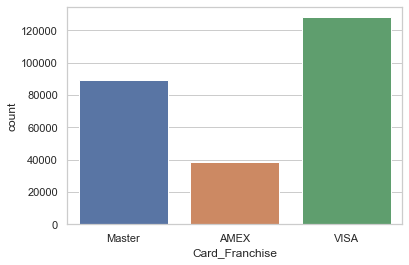

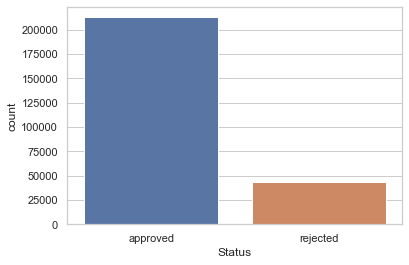

In [8]:
#Analisis exploratorio visual
sns.set(style="whitegrid")
#Analisis univariable
#Analisis frecuencias variables no numericas
for i in colum_no_numeric:
     count_plot=sns.countplot(x=i,data=df_data)
     plt.show()

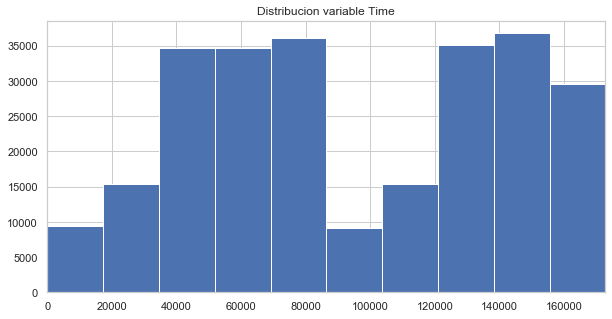

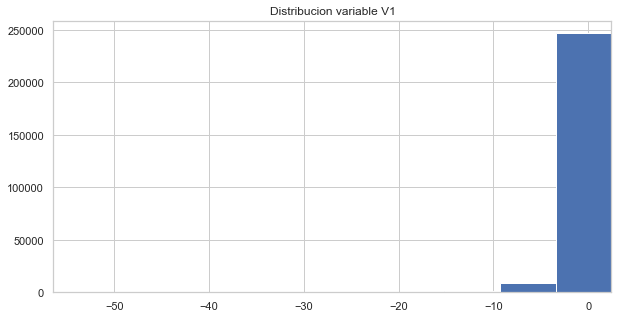

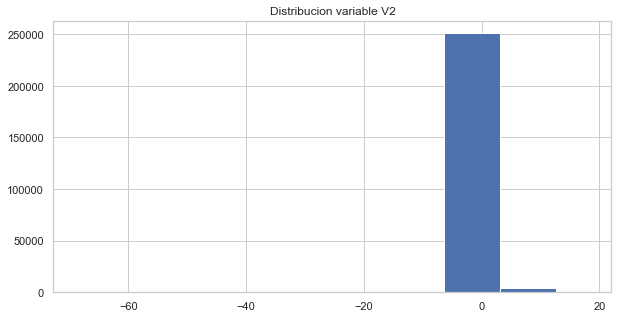

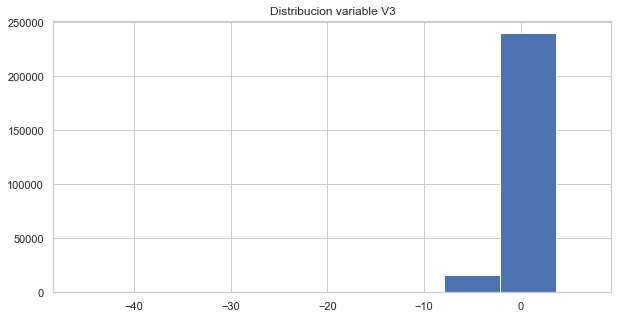

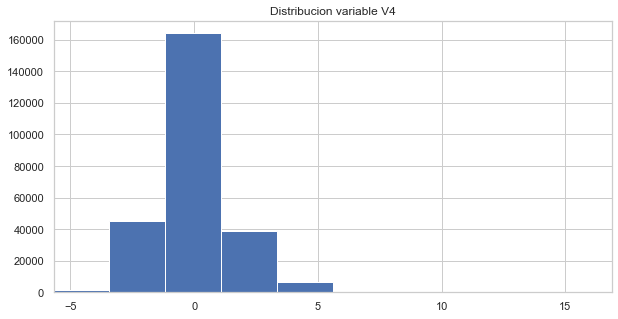

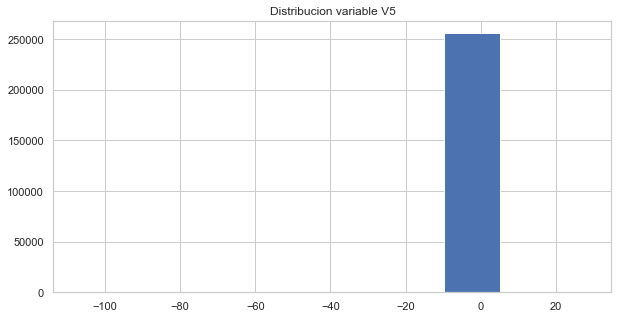

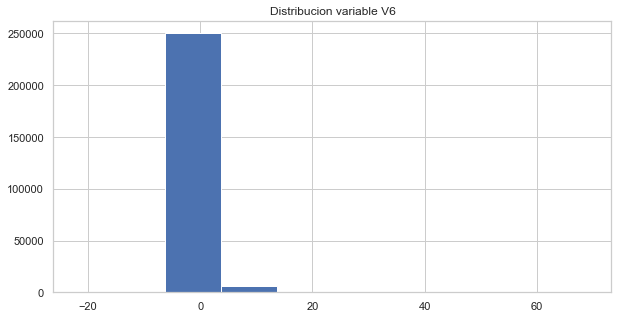

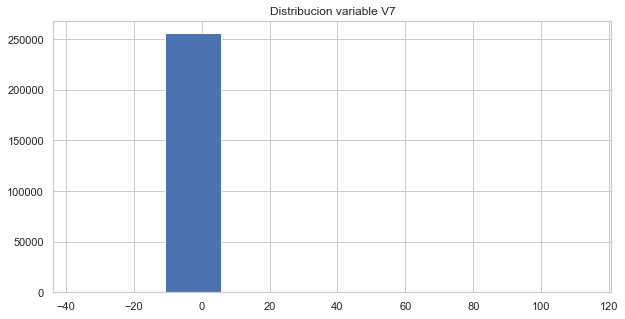

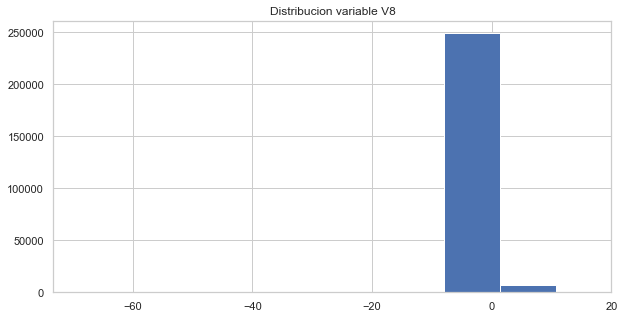

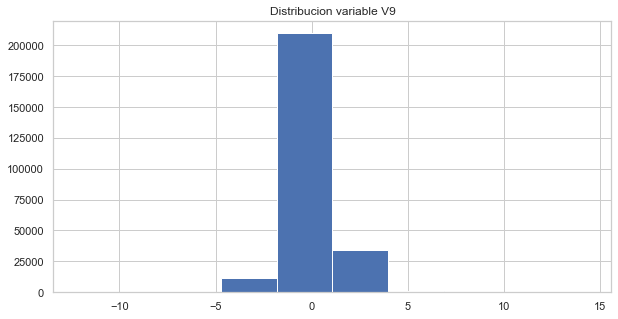

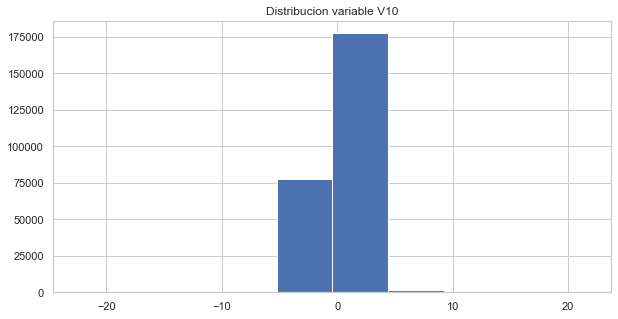

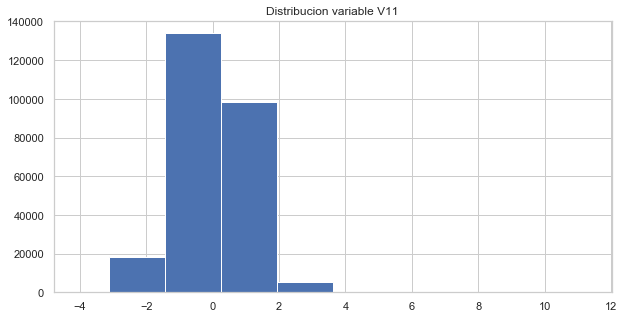

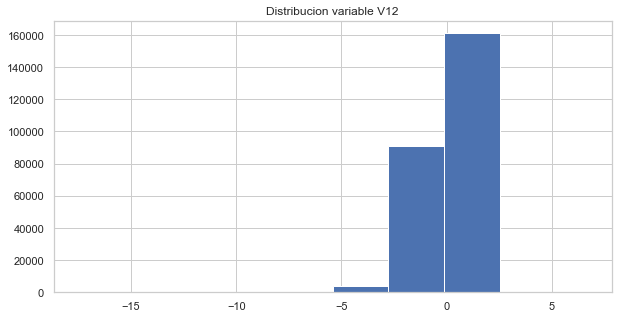

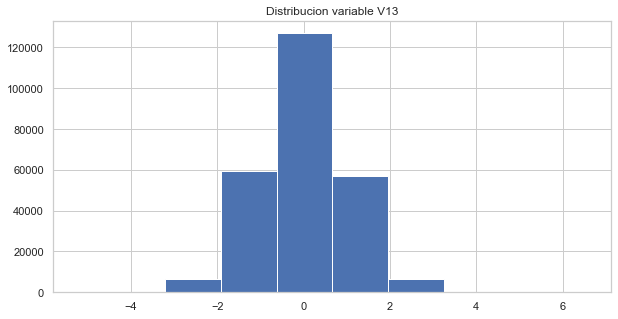

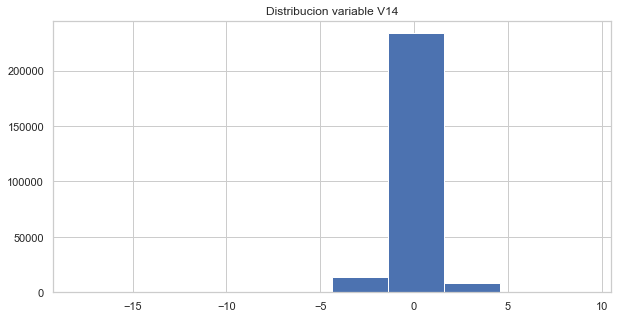

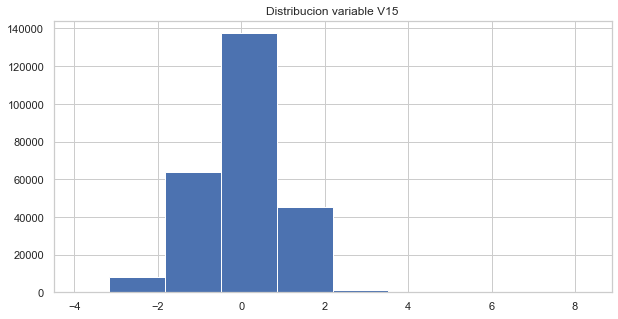

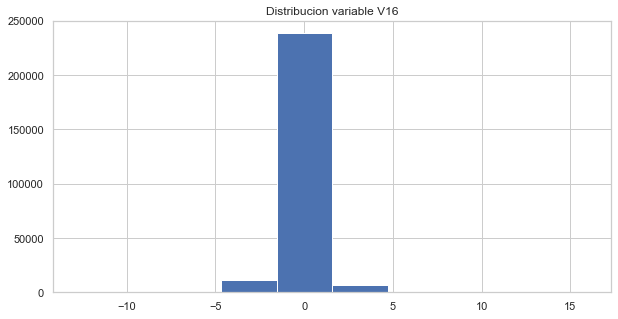

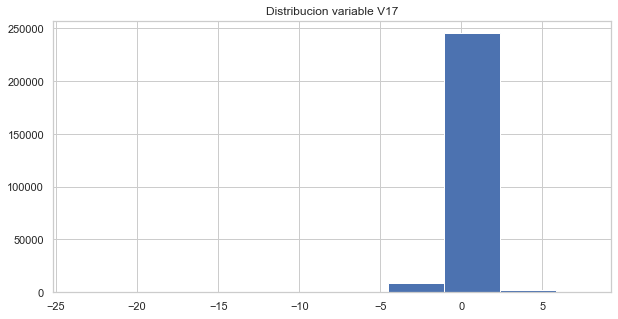

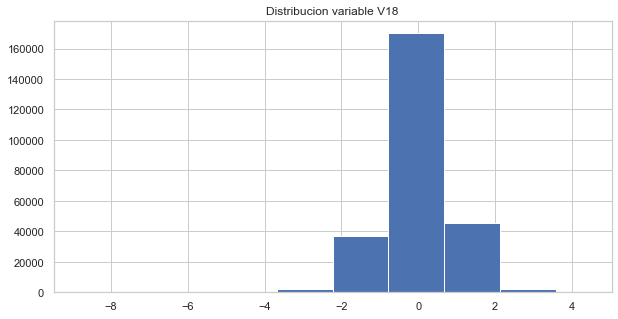

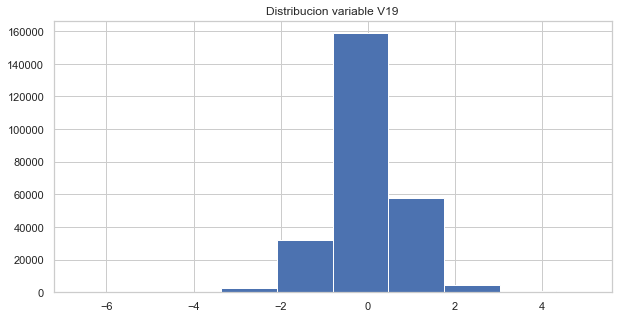

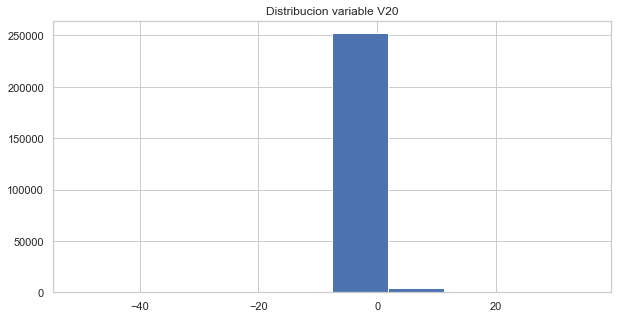

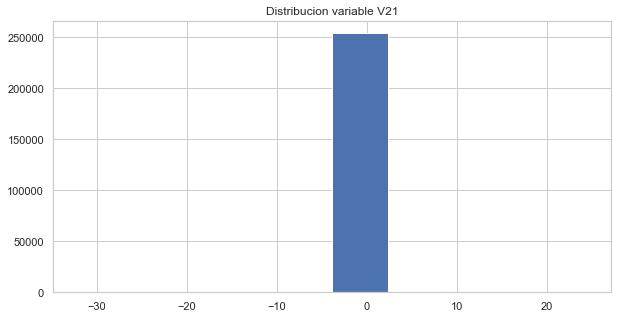

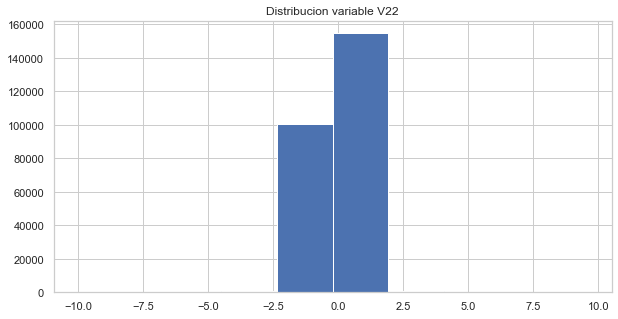

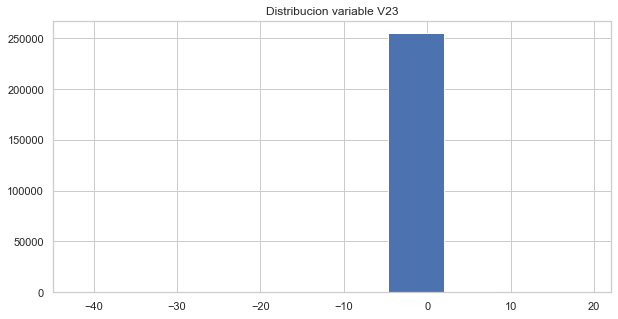

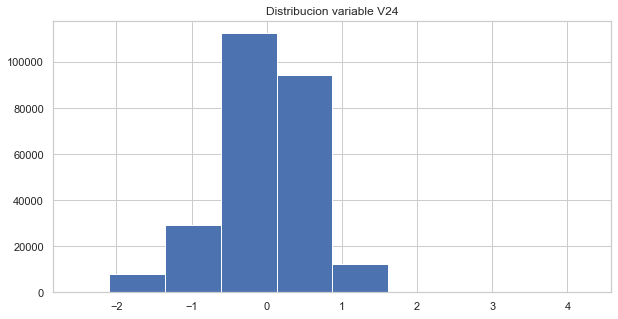

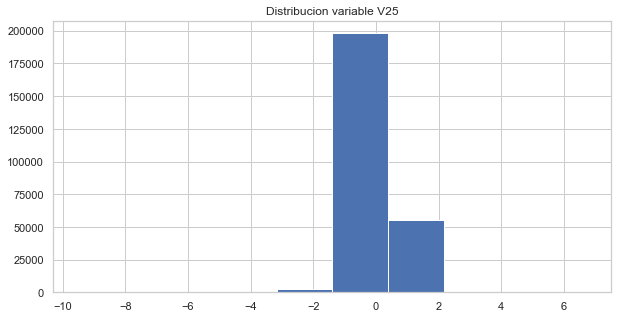

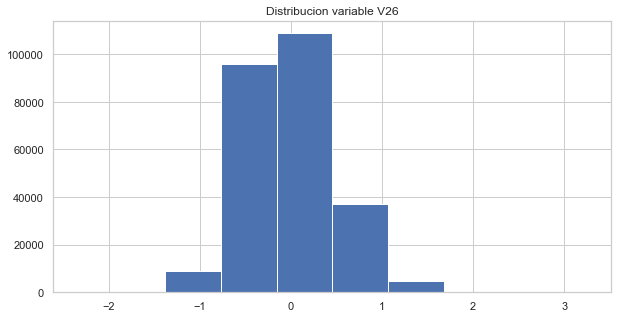

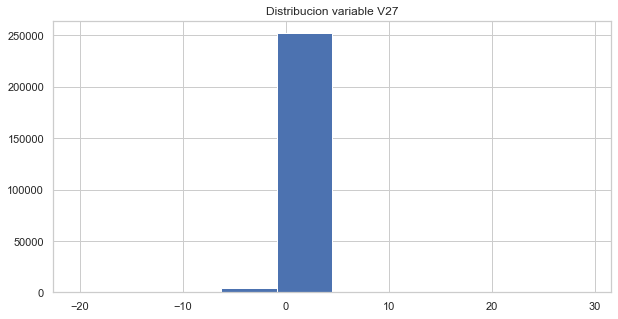

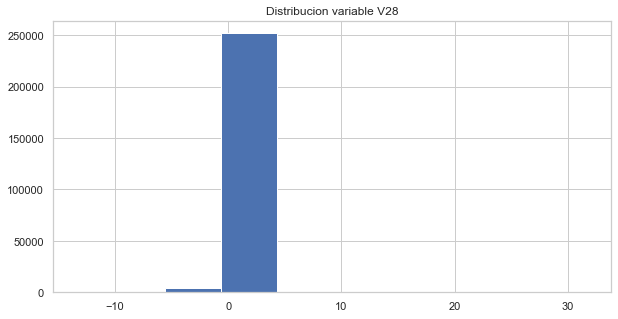

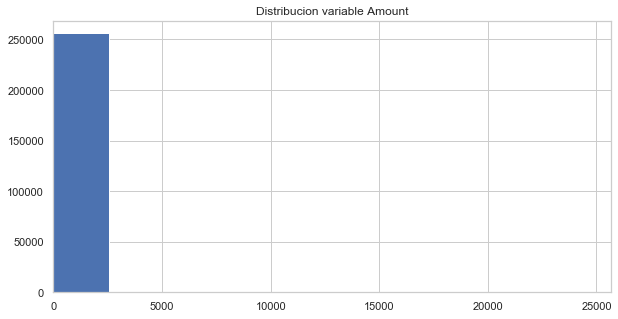

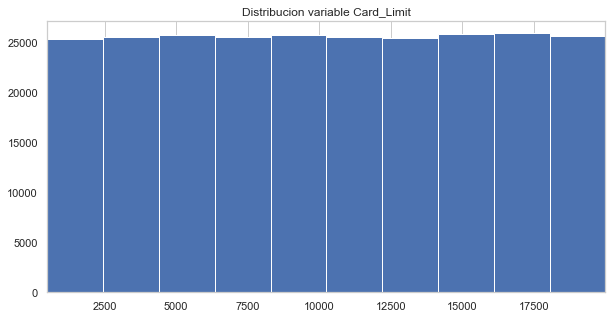

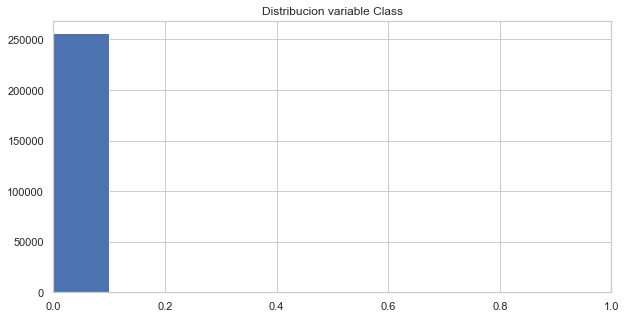

In [9]:
#Analisis frecuencias variables numericas
for i in colum_numeric:
    plt.figure(figsize=(10,5))
    plt.hist(df_data[i])
    plt.xlim((df_data[i].min(),df_data[i].max()))
    plt.title("Distribucion variable "+i)
    plt.show()

In [10]:
print("Distribucion de datos variable Class:")
print(df_data['Class'].value_counts())

Distribucion de datos variable Class:
0    255883
1       443
Name: Class, dtype: int64


## 6. Crear conjunto de entrenamiento y prueba ##

In [4]:
X=df_data.iloc[:,1:-1]
y=df_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
                                                    random_state=142,
                                                   stratify=y)

In [5]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Card_Limit,Card_Franchise,Status
207176,-1.096856,-0.865105,-1.880829,-0.386481,2.359052,-2.089509,1.288247,-0.594769,1.152568,-0.308963,...,1.144757,-0.368095,-0.882247,0.074482,-0.101028,0.631425,3.90,8698,VISA,approved
152186,1.245660,-0.992310,0.438845,-0.949529,-0.945961,0.294411,-1.014280,0.114729,-0.637216,0.728805,...,-0.340046,-0.781189,0.531661,-0.004562,0.017955,0.019667,99.00,7378,Master,approved
119097,1.150526,-1.306611,1.685871,-0.048061,-2.182503,0.419438,-1.590058,0.408984,0.640828,0.425288,...,0.071523,0.576303,0.042424,1.044387,0.010440,0.016419,40.00,7044,Master,approved
133191,-0.121704,0.926316,-0.550150,-0.744084,0.853662,-0.263830,0.754128,0.105781,0.214756,0.236634,...,-0.122646,0.274010,-0.779579,-0.233821,0.597991,0.370100,0.89,9810,AMEX,approved
189434,-3.479577,1.345328,1.887600,0.242371,-2.050368,1.134829,-0.945895,0.707971,1.953456,3.085938,...,-0.471786,-0.102312,0.962859,-0.189869,0.600513,0.225520,50.00,16490,VISA,approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223819,-2.685871,2.669549,-2.569638,-1.026430,-0.669364,-0.368020,-0.976150,2.182818,-0.160268,-0.005118,...,0.164966,-1.418144,-0.045112,0.222445,-0.092791,-0.008155,9.99,8566,VISA,approved
165546,-0.859392,0.869226,1.589948,0.116450,0.683623,0.610100,0.674792,0.320177,-0.440045,-0.578624,...,-0.237509,-0.296085,0.102532,-0.476465,-0.002992,0.092009,8.26,11002,Master,rejected
96187,-0.197258,1.241351,-0.829408,-0.518912,0.600932,-0.828333,0.614454,0.340794,-0.158836,-1.053337,...,0.158501,0.461747,-0.390596,0.122406,0.092130,0.020103,10.98,12118,Master,rejected
202789,-0.828071,1.675466,1.821786,2.722572,-0.147697,-0.527969,0.925603,-0.412389,-0.395736,2.300361,...,-0.128566,0.892809,-0.336210,0.180579,0.400970,-0.022998,19.67,12612,VISA,approved


## 7. Definir transformadores ##

In [6]:
categorical_features = ['Card_Franchise','Status']

# define the data preparation for the columns
t = [('cat', OneHotEncoder(drop='first'), categorical_features)]
col_transform = ColumnTransformer(transformers=t, remainder='passthrough')


In [14]:
x_train_transf=col_transform.fit_transform(X_train)

x_test_transf=col_transform.fit_transform(X_test)

x_train_transf.shape

(205060, 33)

## 7. 2 Visualizar importancias de caracterisiticas ###

In [15]:
# Creamos un objeto arbol
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=6, random_state = 123)
tree.fit(x_train_transf, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [16]:
y_pred_prob = tree.predict_proba(x_test_transf)[:,1]>0.5
print("f1score_test: {}".format(f1_score(y_test, y_pred_prob)))

y_train_prob = tree.predict_proba(x_train_transf)[:,1]>0.5 
print("f1score_train: {}".format(f1_score(y_train, y_train_prob)))

f1score_test: 0.8488372093023256
f1score_train: 0.8906009244992296


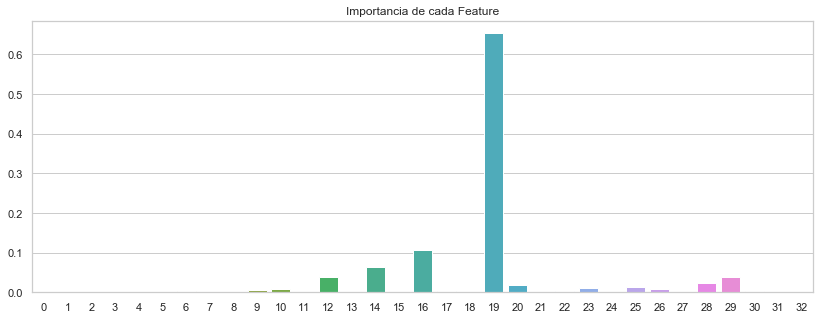

In [17]:
importances = tree.feature_importances_
tree_columns = np.arange(0,len(tree.feature_importances_))
plt.figure(figsize=(14,5))
sns.barplot(tree_columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

## 8. Ajustar Hiperparametros RandomForest ##

### 8.1 Crear grid de parametros ###

In [18]:
# Number of trees in random forest
n_estimators = (50,120)
# Number of features to consider at every split
max_features = (0.4,1)
# Maximum number of levels in tree
max_depth = (2,10)

# Minimum number of samples required to split a node
min_samples_split = (2,10)
# Minimum number of samples required at each leaf node
min_samples_leaf = (1,4)
# Create the random grid
random_grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
print(random_grid_rf)

{'n_estimators': (50, 120), 'max_features': (0.4, 1), 'max_depth': (2, 10), 'min_samples_split': (2, 10), 'min_samples_leaf': (1, 4)}


### 8.2 Crear funcion a optimizar para RF ###

In [19]:
def train_model_rf(n_estimators,max_features,max_depth,min_samples_split,min_samples_leaf):
    scores= cross_val_score(RandomForestClassifier(
                                   n_estimators=int(n_estimators),  
                                   max_features=max_features,
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   n_jobs=-1, 
                                   random_state=42),  
                             X=x_train_transf, 
                             y=y_train, 
                             cv=5,
                             scoring="roc_auc",
                             n_jobs=-1)
    
    scores=np.where(scores>=0.99, 0,scores) 
    
    
    return scores.mean()

### 8.3 Crear optimizador RF ###

In [20]:
optimizer_rf = BayesianOptimization(f=train_model_rf,
                                    pbounds=random_grid_rf,
                                    random_state=1)

### 8.4 Ejecutar optimizador RF ###

In [21]:
optimizer_rf.maximize(init_points=5, n_iter=20)

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
|  1        |  0.953    |  5.336    |  0.8322   |  1.0      |  4.419    |  60.27    |
|  2        |  0.9202   |  2.739    |  0.5118   |  2.037    |  5.174    |  87.72    |
|  3        |  0.9491   |  5.354    |  0.8111   |  1.613    |  9.025    |  51.92    |
|  4        |  0.9698   |  7.364    |  0.6504   |  2.676    |  3.123    |  63.87    |
|  5        |  0.9676   |  8.406    |  0.981    |  1.94     |  7.539    |  111.3    |
|  6        |  0.9757   |  9.37     |  0.5589   |  2.577    |  2.598    |  119.7    |
|  7        |  0.9686   |  9.915    |  0.9924   |  1.243    |  3.972    |  50.72    |
|  8        |  0.9697   |  9.923    |  0.6577   |  1.378    |  9.327    |  73.45    |
|  9        |  0.9733   |  8.021    |  0.6751   |  3.968    |  9.555    |  119.5    |
|  10       |  0.9703   |  9.987    |  0.774    |  3.9

### 8.5 Seleccionar mejores parametros del optimizador RF ###

In [22]:
best_rf = optimizer_rf.max

best_params_rf=best_rf['params']
best_params_rf['n_estimators']=int(best_params_rf['n_estimators']) 
best_params_rf['max_depth']=int(best_params_rf['max_depth'])
best_params_rf['min_samples_split']=int(best_params_rf['min_samples_split'])
best_params_rf['min_samples_leaf']=int(best_params_rf['min_samples_leaf'])
best_params_rf

{'max_depth': 9,
 'max_features': 0.5589048298359589,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 119}

### 8.6 Crear modelo RF  con mejores parametros###

In [23]:
model_rf = RandomForestClassifier(n_jobs=-1,random_state=42)
model_rf.set_params(**best_params_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9,
                       max_features=0.5589048298359589, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=119, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

### 8.7 Entrenar mejor modelo RF ###

In [24]:
model_rf.fit(x_train_transf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9,
                       max_features=0.5589048298359589, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=119, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

### 8.8 Evaluar mejor modelo RF Train -Test ###

In [25]:
y_train_prob = model_rf.predict_proba(x_train_transf)[:,1]>0.5
print("f1score_train: {}".format(f1_score(y_train, y_train_prob)))

y_pred_prob = model_rf.predict_proba(x_test_transf)[:,1]>0.5
print("f1score_test: {}".format(f1_score(y_test.values, y_pred_prob)))

f1score_train: 0.9046153846153846
f1score_test: 0.8554216867469879


### 8.9 Guardar mejor modelo RF ###

In [26]:
# save the model to disk
filename_rf = 'rf_tuned_model.sav'
pickle.dump(model_rf, open(filename_rf, 'wb'))

## 9. Ajustar Hiperparametros XGBoost ##

### 9.1 Crear grid de parametros ###

In [29]:
mascara_n = df_data.Class==0

mascara_p = df_data.Class==1

ratio = mascara_n.sum()/mascara_p.sum()

gbm_param_grid = {
    'learning_rate': (0,1),
    'max_depth': (5,20),
    'n_estimators': (1,500),
    'colsample_bytree':(0.4,0.8),
    'min_child_weight':(1,20),
    'gamma':(0,10),
    'reg_lambda': (0,10),
    'scale_pos_weight':(np.sqrt(ratio),ratio)}
    
print(gbm_param_grid)

{'learning_rate': (0, 1), 'max_depth': (5, 20), 'n_estimators': (1, 500), 'colsample_bytree': (0.4, 0.8), 'min_child_weight': (1, 20), 'gamma': (0, 10), 'reg_lambda': (0, 10), 'scale_pos_weight': (24.03360138400667, 577.6139954853273)}


### 9.2 Crear funcion a optimizar para XGBoost ###

In [30]:
# DEFINIR FUNCION OPTIMIZAR PARA XGBOOST

def train_model_xgb(learning_rate, max_depth, n_estimators, 
                    colsample_bytree, min_child_weight, 
                    reg_lambda, scale_pos_weight, gamma):
    
    scores= cross_val_score(
               xgb.XGBClassifier(
                       objective="binary:logistic",
                       learning_rate=max(learning_rate, 0),
                       max_depth=int(max_depth),
                       n_estimators=int(n_estimators),
                       colsample_bytree=max(colsample_bytree,0),
                       min_child_weight = int(min_child_weight),
                       gamma=int(gamma),
                       reg_lambda=max(reg_lambda,0),
                       seed=42,
                       nthread=-1,
                       scale_pos_weight = int(ratio)),  
        
               X=x_train_transf, 
               y=y_train, 
               cv=5,
               scoring="roc_auc",
               n_jobs=-1)
     
    return scores.mean()

### 9.3 Crear optimizador XGBoost ###

In [31]:
optimizer_xgb = BayesianOptimization(f=train_model_xgb,
                                    pbounds=gbm_param_grid,
                                    random_state=1)

### 9.4 Ejecutar optimizador XGBoost ###

In [32]:
optimizer_xgb.maximize(init_points=10, n_iter=20)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | reg_la... | scale_... |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.9643   |  0.5668   |  7.203    |  0.000114 |  9.535    |  3.788    |  47.08    |  1.863    |  215.3    |
|  2        |  0.9714   |  0.5587   |  5.388    |  0.4192   |  15.28    |  4.885    |  439.2    |  0.2739   |  395.2    |
|  3        |  0.9738   |  0.5669   |  5.587    |  0.1404   |  7.972    |  16.21    |  484.2    |  3.134    |  407.3    |
|  4        |  0.9735   |  0.7506   |  8.946    |  0.08504  |  5.586    |  4.227    |  439.2    |  0.9835   |  257.2    |
|  5        |  0.9703   |  0.7832   |  5.332    |  0.6919   |  9.733    |  14.04    |  417.5    |  0.1829   |  439.3    |
|  6        |  0.9735   |  0.7955   |  7.482    |  0.2804   |  16.84    |  2.961    |  224.5    |  9.086    |  186.6    |
|  7        |  0.9734   

### 9.5 Seleccionar mejores parametros del optimizador XGBoost ###

In [33]:
best_xgb = optimizer_xgb.max

best_params_xgb=best_xgb['params']
best_params_xgb['n_estimators']=int(best_params_xgb['n_estimators']) 
best_params_xgb['max_depth']=int(best_params_xgb['max_depth'])
best_params_xgb['min_child_weight']=int(best_params_xgb['min_child_weight'])
best_params_xgb['scale_pos_weight'] = int(best_params_xgb['scale_pos_weight'])
best_params_xgb

{'colsample_bytree': 0.5250299598517494,
 'gamma': 3.0819951010249524,
 'learning_rate': 0.04018585126253471,
 'max_depth': 19,
 'min_child_weight': 1,
 'n_estimators': 319,
 'reg_lambda': 9.421894473314422,
 'scale_pos_weight': 303}

### 9.6 Crear modelo XGBoost  con mejores parametros###

In [34]:
model_xgb =xgb.XGBClassifier(objective="binary:logistic",seed=42,
                       nthread=-1)
model_xgb.set_params(**best_params_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5250299598517494,
              gamma=3.0819951010249524, learning_rate=0.04018585126253471,
              max_delta_step=0, max_depth=19, min_child_weight=1, missing=None,
              n_estimators=319, n_jobs=1, nthread=-1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=9.421894473314422, scale_pos_weight=303, seed=42,
              silent=None, subsample=1, verbosity=1)

### 9.7 Entrenar mejor modelo XGBoost ###

In [35]:
model_xgb.fit(x_train_transf, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5250299598517494,
              gamma=3.0819951010249524, learning_rate=0.04018585126253471,
              max_delta_step=0, max_depth=19, min_child_weight=1, missing=None,
              n_estimators=319, n_jobs=1, nthread=-1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=9.421894473314422, scale_pos_weight=303, seed=42,
              silent=None, subsample=1, verbosity=1)

### 9.8 Evaluar mejor modelo XGBoost Train -Test ###

In [36]:
y_train_prob = model_xgb.predict_proba(x_train_transf)[:,1]>0.5
print("f1score_train: {}".format(f1_score(y_train, y_train_prob)))

y_pred_prob = model_xgb.predict_proba(x_test_transf)[:,1]>0.5
print("f1score_test: {}".format(f1_score(y_test.values, y_pred_prob)))

f1score_train: 0.9725274725274725
f1score_test: 0.8636363636363635


### 9.9 Guardar mejor modelo XGBoost ###

In [37]:
# save the model to disk
filename_xgb = 'xgb_tuned_model.sav'
pickle.dump(model_xgb, open(filename_xgb, 'wb'))

## 10. Comprar RF vs XGBoost ##

In [11]:
seeds = np.random.randint(1,9999, size=5)
seeds=np.append(seeds,142)
rf_test_score =[]
xgb_test_score =[]

filename_rf = 'rf_tuned_model.sav'
model_rf = pickle.load(open(filename_rf, 'rb'))

filename_xgb = 'xgb_tuned_model.sav'
model_xgb = pickle.load(open(filename_xgb, 'rb'))

for i in seeds:
    print(i)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
                                                        random_state=i,
                                                        stratify=y)
    
    x_train_transf=col_transform.fit_transform(X_train)
    
    x_test_transf=col_transform.transform(X_test)
    
    model_rf.fit(x_train_transf, y_train)
    model_xgb.fit(x_train_transf, y_train)
    
    y_pred_prob_rf = model_rf.predict_proba(x_test_transf)[:,1]>0.5
    rf_test_score.append(f1_score(y_test, y_pred_prob_rf))
    
    y_pred_prob_xgb = model_xgb.predict_proba(x_test_transf)[:,1]>0.5
    xgb_test_score.append(f1_score(y_test, y_pred_prob_xgb))

1314
6678
9520
3020
19
142


In [12]:
dicc_scores= {'SEEDS':seeds,'RF_TEST_SCORES':rf_test_score,'XGB_TEST_SCORES':xgb_test_score}
df_scores=pd.DataFrame.from_dict(dicc_scores)
df_scores

,SEEDS,RF_TEST_SCORES,XGB_TEST_SCORES
0,1314,0.814371,0.804469
1,6678,0.810127,0.835294
2,9520,0.852071,0.831461
3,3020,0.879518,0.877193
4,19,0.867470,0.877193
5,142,0.855422,0.863636


In [13]:
df_scores.describe()

,SEEDS,RF_TEST_SCORES,XGB_TEST_SCORES
count,6.000000,6.000000,6.000000
mean,3448.833333,0.846496,0.848208
std,3865.925422,0.028270,0.029253
min,19.000000,0.810127,0.804469
25%,435.000000,0.823796,0.832419
50%,2167.000000,0.853746,0.849465
75%,5763.500000,0.864458,0.873804
max,9520.000000,0.879518,0.877193
